# 2 - Introductory Example: Ground Irradiance Analysis for AgriPV

This jupyter journal will walk us through the creation of the most basic fixed-tilt simulation possible with bifacialvf.
We will simulate a 1-up landscape system over a grass albedo and look at the ground irradiance from the start of 1 row to the other.


In [6]:
from pathlib import Path
import os
import bifacialvf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Test'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'bold',
'size'   : 22}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
starttimes =['2005-05-01 1:30:0', '2007-06-01 1:30:0', '2020-07-01 1:30:0', '2020-08-01 1:30:0', '2002-09-01 1:30:0', '1998-10-01 1:30:0']
endtimes = ['2005-05-31 23:30:0', '2007-06-30 23:30:0','2020-07-31 23:30:0', '2020-08-31 23:30:0', '2002-09-30 23:30:0', '1998-10-31 23:30:0']
months = ['May','Jun','Jul','Aug','Sep','Oct']

for ti in range (0, len(starttimes)):
    starttime = pd.to_datetime(starttimes[ti])
    endtime = pd.to_datetime(endtimes[ti])
    month = months[ti]
    #demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime) # Name and path
    # Download and Read input
    #TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
    TMYtoread = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\EPWs\nespelem_wa_48.167039_-118.976656_psm3-tmy_60_tmy_TMY3formatV2.csv'
    myTMY3, meta = bifacialvf.readInputTMY(TMYtoread, startrime = starttime, endtime = endtime)
    deltastyle = 'TMY3'

In [68]:


# Variablee
starttimes =['2005-05-01 1:30:0', '2007-06-01 1:30:0', '2020-07-01 1:30:0', '2020-08-01 1:30:0', '2002-09-01 1:30:0', '1998-10-01 1:30:0']
endtimes = ['2005-05-31 23:30:0', '2007-06-30 23:30:0','2020-07-31 23:30:0', '2020-08-31 23:30:0', '2002-09-30 23:30:0', '1998-10-31 23:30:0']
months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 48.167039
lon = -118.976656  #Lat and Long for Nespelem, WA           
tilt = 25                  # PV tilt (deg)
sazms = np.array([180, 150, 210]) #cycling through 3 different azimuths                  # PV Azimuth(deg) or tracker axis direction
albedo = 0.8  # Changed from 0.31 for test 6/9/22
x = 2.031
y = 1.008 
xgap =  0.9144   
nMods = 7
ygap = .02 # Meters
numpanels = 4
CW = y * numpanels + (numpanels-1)*ygap
#CW = x + 2*xgap
clearance_height=1.45/CW #1.5m / collector width
D = 2.8    

 

pitch = (((y * numpanels) * np.cos(np.radians(tilt)))+D)/CW
print(pitch)
#pitch = 2/0.35/2              # 1 / 0.35 where 0.35 is gcr --- row to row spacing in normalized panel lengths. 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True

 # Calculate PV Output Through Various Methods    
# calculateBilInterpol = False   # Only works with landscape at the moment.
# calculatePVMismatch = False
# portraitorlandscape='portrait'   # portrait or landscape
# cellsnum = 72
# bififactor = 1.0

# Tracking instructions
tracking=False
backtrack=False
limit_angle = 65



#for ti in range (0, len(starttimes)):
 #   starttime = pd.to_datetime(starttimes[ti])
  #  endtime = pd.to_datetime(endtimes[ti])
   # month = months[ti]
    #demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime) # Name and path
    # Download and Read input
    #TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
TMYtoread = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\EPWs\nespelem_wa_48.167039_-118.976656_psm3-tmy_60_tmy_TMY3formatV2.csv'
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread) #starttime=starttime, endtime=endtime these don't work. Need another way to control dates
deltastyle = 'TMY3'
    #myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
for az in range (0, len(sazms)):
        #Build scene and run raytracing for all 3 azimuths
    sazm = sazms[az]
    writefiletitle = os.path.join(testfolder, 'Results_Test_az_'+str(sazm)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

#Load the results from the resultfile
from bifacialvf import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)

1.5772807911367968
Calculating Sun position with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  180     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.8
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Test\Results_Test_az_180.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  2.0197831672109294
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:43<00:00, 85.01it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  150     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.8
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Test\Results_Test_az_150.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  2.5431554219159778
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:41<00:00, 86.09it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  210     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.8
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Test\Results_Test_az_210.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.9552116439657368
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:41<00:00, 86.50it/s]


Finished


In [69]:
print(clearance_height,pitch)

0.3543499511241447 1.5772807911367968


In [ ]:
bifacialvf.simulate

In [9]:
from bifacialvf import loadVFresults
writefile180 = os.path.join(testfolder,'Results_Test_az_180.csv')
(data, metadata) = loadVFresults(writefile180)

In [ ]:
print(writefile180)

# 5. Analyze the results from the resultfile


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)

In [12]:
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)

In [74]:
print(df)

date          Jan          Feb           Mar            Apr            May  \
0     5164.762291  7639.476759  14460.960643  120430.441288  154470.469449   
1     4978.705220  7364.269772  15051.538926  123008.467380  152268.344598   
2     4794.595760  7091.943600  14842.907116  123674.574255  146103.782095   
3     4614.041639  6824.876322  15532.220354  126016.773868  143331.252140   
4     4438.540067  6565.282539  17387.402242  125617.762771  140962.749702   
..            ...          ...           ...            ...            ...   
95    6034.332931  8925.705305  15791.749515  102552.681788  161340.772887   
96    5861.657297  8670.291520  15520.346339  106046.364394  160508.476799   
97    5682.720685  8405.616785  15078.951230  109772.648511  159850.288753   
98    5499.011254  8133.882318  14851.848208  113090.704660  159174.544698   
99    5312.129765  7857.455890  14779.788701  117078.928151  158487.132766   

date            Jun            Jul            Aug           Sep

In [75]:
print(df.Jun.min())

15042.352483735353


## Bring in Corresponing data from Bifacial Radiance

In [3]:
from bifacialvf import loadVFresults
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_May_az_180_Ground_Analysis_Front.csv'
(data2, metadata) = loadVFresults(Radiance_File)

In [4]:
#Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
# file are (0,-1.825) to (0,4.625). This is rows 13222 through 13287 (65 points) in the excel file. Will isolate these rows
#data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                   #data2.columns[4]: "Wm2Front",}, inplace = True)
#print(data2)
data_line = data2.iloc[13253:13269] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
#data_line_f=np.flipud(data_line)
data_line_f = data_line[::-1].reset_index(drop = True) 
data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
#we're focused on later points.
print(data_line_f)
#print(data_line_f['Wm2Front'].min())

      x         y     z      mattype  Wm2Front
0   0.0 -0.291350  0.05  groundplane  164656.9
1   0.0 -0.190381  0.05  groundplane  162681.7
2   0.0 -0.089412  0.05  groundplane  163393.1
3   0.0  0.011557  0.05  groundplane  155039.5
4   0.0  0.112526  0.05  groundplane  146328.5
5   0.0  0.213494  0.05  groundplane  135191.1
6   0.0  0.314463  0.05  groundplane  123910.7
7   0.0  0.415432  0.05  groundplane  117041.1
8   0.0  0.516401  0.05  groundplane  111597.1
9   0.0  0.617369  0.05  groundplane  104543.2
10  0.0  0.718338  0.05  groundplane  104020.3
11  0.0  0.819307  0.05  groundplane  105313.6
12  0.0  0.920276  0.05  groundplane  108662.3
13  0.0  1.021245  0.05  groundplane  116998.1
14  0.0  1.122213  0.05  groundplane  121369.4
15  0.0  1.223182  0.05  groundplane  128458.9


In [7]:
xstep = (len(data_line_f))
x_axis = list(range(1,101))
x_axis_rad = np.linspace(0,100,xstep)
#print(x_axis_rad)
#print(x_axis)

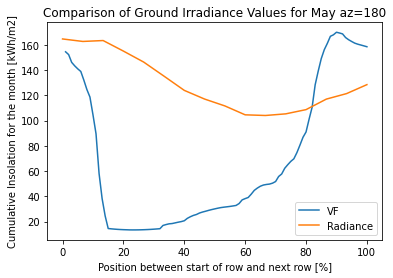

In [13]:
plt.figure(1)
VF = plt.plot(x_axis, df['May']/1000, label='VF')
#fig = (df['May']/1000).plot()
Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
#fig.set_xlabel('Position between start of row and next row [%]')
#fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.title('Comparison of Ground Irradiance Values for May az=180')
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend(handles=[VF[0], Radiance[0]])
#Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Bar Plots of Irradiance Factors for each month

In [14]:
#data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
#data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
ghi = data['ghi'] #.str.strip('[]').str.split(' ', expand=True).astype(float)

In [15]:
dates = ['May','Jun','Jul','Aug','Sep','Oct']
dghi = ghi.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
print(dghi)
#dghi.rename(columns={ dghi.rows[0]: "Jan", dghi.columns[1]: "Feb",dghi.columns[2]: "Mar", dghi.columns[3]: "Apr",
                   #dghi.columns[4]: "May",dghi.columns[5]: "June",dghi.columns[6]: "July",dghi.columns[7]: "Aug",
                   #dghi.columns[8]: "Sept",dghi.columns[9]: "Oct",dghi.columns[10]: "Nov",dghi.columns[11]: "Dec"    }, inplace = True)

date
2021-01-31 00:00:00-08:00     31408.852748
2021-02-28 00:00:00-08:00     58163.039240
2021-03-31 00:00:00-08:00    102667.133770
2021-04-30 00:00:00-08:00    153951.742639
2021-05-31 00:00:00-08:00    193226.204375
2021-06-30 00:00:00-08:00    203666.180803
2021-07-31 00:00:00-08:00    233165.445912
2021-08-31 00:00:00-08:00    201076.287745
2021-09-30 00:00:00-08:00    138290.738569
2021-10-31 00:00:00-08:00     84477.895755
2021-11-30 00:00:00-08:00     42850.672965
2021-12-31 00:00:00-08:00     27551.170195
Freq: M, Name: ghi, dtype: float64


In [16]:
Rad_irr_factor=[]
VF_irr_factor=[]
for ti in range (0, len(dates)):
    month = dates[ti]
    ghitot = dghi[ti+5]
    #Min for VF data
    VFmin = df[month].min() 
    #Min for Radiance data
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_'+month+'_az_180_Ground_Analysis_Front.csv'
    (dataR, metadata) = loadVFresults(Radiance_File)
    data_lineR = dataR #.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line_fR = data_lineR[::-1].reset_index(drop = True)
    data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
    Radmin =  data_line_fR['Wm2Front'].min()
    Radirr = Radmin/ghitot
    VFirr = VFmin/ghitot
    Rad_irr_factor.append(Radirr)
    VF_irr_factor.append(VFirr)

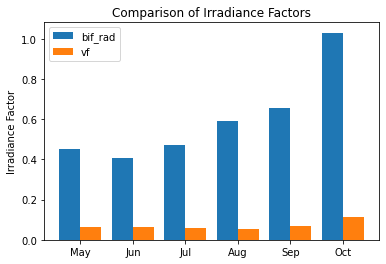

In [17]:
dates_e = ['May','Jun','Jul','Aug','Sep','Oct','Nov']
x_axis = np.arange(len(dates))
# Multi bar Chart
plt.bar(x_axis -0.2, Rad_irr_factor, width=0.4, label = 'bif_rad')
plt.bar(x_axis +0.2, VF_irr_factor, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

[0.35975896203367724, 0.21652501099980623, 0.12724007164620707, 0.08697417445962671, 0.09305646720959483, 0.08829214081868035, 0.07778386220047706, 0.07617849512855072, 0.10201056169980359, 0.3044257312712643, 0.29407678286903055, 0.42127309506326166]


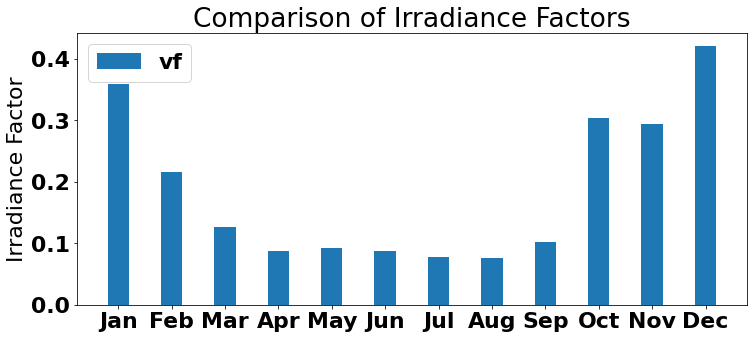

In [66]:
VF_all =  VF_irr_factor
VF_all.append(df['Nov'].min()/dghi[10])
VF_all.append(df['Dec'].min()/dghi[11])
VF_all.insert(0,df['Apr'].min()/dghi[3])
VF_all.insert(0,df['Mar'].min()/dghi[2])
VF_all.insert(0,df['Feb'].min()/dghi[1])
VF_all.insert(0,df['Jan'].min()/dghi[0])
print(VF_all)
dates_e = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_axis = np.arange(len(dates_e))
# Multi bar Chart
plt.bar(x_axis, VF_all, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates_e)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

In [ ]:
monthlyGHI = pd.DataFrame(data['ghi'].groupby([pd.Grouper(freq='M')]).sum())

In [ ]:
monthlyGHI['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
monthlyGHI.set_index(monthlyGHI['Month'], inplace=True)
monthlyGHI = monthlyGHI.drop(columns='Month')

In [ ]:
print(monthlyGHI)

In [ ]:
df_norm = df.T
df_norm = df_norm.div(monthlyGHI['ghi'], axis=0)
df_norm = df_norm.T

In [ ]:
fig = (df_norm).plot()
fig.set_xlabel('Position between start of row and next row [%]')
fig.set_ylabel('Normalized Insolation for the month/GHI')